<img src="wzl_rwth.png" style="padding-left: 20px; float: right;" />

<h1 style="color: blue;">Basisseminar Digitalisierung</h1>
<h2 style="color: #D7A5F4;">Anwendungsbeispiel Überwachtes Lernen: <br /> Erkennung von per Hand geschriebenen Zahlen mithilfe eines Künstlichen Neuronalen Netzes</h2>
 



*Generelle Anmerkungen*
- Eine Code-Zelle kann ausgeführt werden, indem man auf die jeweilige Zelle klickt und dann *STRG* & *Enter* drückt

## Probemstellung
In diesem Notebook geht es um die Grundlagen von Künstlichen Neuronalen Netzen, welche anhand eines Anwendungsbeispiels aus dem Bereich des Überwachten Lernens verdeutlicht werden. Hierzu wird von Grund auf ein neuronales Netz aufgebaut, welches dazu in der Lage sein soll per Hand geschriebene Zahlen zu erkennen.

### Erster Schritt - Bibliothek
Als erstes müssen einige Code-Bibliotheken importiert werden, die unter anderem diverse Bauteile, welche für die Erstellung eines Neuronalen Netzes bentutzt werden können, bereitstellen.

In [1]:
#Import of tensorflow and quick version test
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

# Dynamische Allokation von GPU Memory für den Fall, dass TensorFlow-GPU benutzt
#config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
#config.gpu_options.allow_growth = True
#session = tf.compat.v1.Session(config=config)

#Import of matplotlib for visualization purposes
import matplotlib.pyplot as pyplot

#import numpy
import numpy as np

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


### Zweiter Schritt - Daten
Als nächstes kann die zuvor importierte Code-Bibliothek dazu genutzt werden, einen Beispieldatensatz zu importieren. In diesem Anwendungsbeispiel benutzen wir einen Datensatz, welcher Daten handgeschriebenen Zahlen enthält. <br />
Die Zahlen werden dabei durch Bilder mit 28x28 Pixeln repräsentiert, welchen jeweils ein Label von 0 bis 9 zugeordnet wird (je nachdem ob auf das Bild für eine 0, 1, 2 usw. steht).

In [2]:
data = tf.keras.datasets.mnist

Danach müssen die Daten in einen Trainings- sowie Testdatensatz unterteilt werden. Wie bereits im Vortrag erläutert, wird das Künstliche Neuronale Netz nur mit einem Teil der Daten “trainiert” und mit einem (dem Netz unbekannten) Teil der Daten “getestet”. Damit vermeidet man, dass das Modell einfach nur die Daten abspeichert, ohne eine “echte” Systematik zu lernen (“Overfitting”). <br />
Testet man das Netz auf den gleichen Daten, auf denen man auch trainiert hat, führt dies einfach nur dazu, dass das Netz die Label der einzelnen Datenpunkte speichert anstatt die zu Grunde liegende Struktur dahinter zu erkennen, was für eine Generalisierung notwendig wäre.

In [3]:
(numbers_train, number_labels_train), (numbers_test, number_labels_test) = data.load_data()

Um ein besseres Gefühl für die Daten zu bekommen, kann man sich eine Zahl sowie das dazugehörige Label aus dem Trainingsdatensatz visualisieren lassen.

Eine Zahl aus dem Trainingsdatensatz:


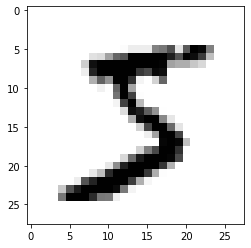

Das zugehörige Label lautet:  5


In [4]:
print("Eine Zahl aus dem Trainingsdatensatz:")
pyplot.imshow(numbers_train[0], cmap=pyplot.cm.binary)
pyplot.show()

print("Das zugehörige Label lautet: ", number_labels_train[0])

### Dritter Schritt - Neuronales Netzwerk
Nachdem die Daten zum Trainieren des Künstlichen Neuronalen Netzes nun in den Speicher geladen sind und wir darauf zugreifen können, können wir als Nächstes mithilfe der anfangs importierten Code-Bibliothek ein Netz konstruieren. <br />
Als Erstes muss man den Typ des Models festlegen. In diesem Beispiel benutzen wir das im Vortrag vorgestellte Netz (ein so genanntes sequentielles Künstliches Neuronales Netz).
<img src="sequential_model.png" style="width: 659px; height: 431px"/>

In [5]:
model = Sequential()

Da die Bilder der Zahlen jeweils 28x28 Pixel haben, also zwei Dimensionen besitzen (Höhe und Breite), das oben abgebildete Netzwerk allerdings nur eine Dimension in dem Input-Layer besitzt (vektorförmig), müssen die Daten "flach" gemacht werden. Die Daten der Form 28x28 erhalten somit die Form 1x784. Dazu kann ganz einfach ein "Flatten layer" (Bauteil "Flatten()") benutzt werden, die wir unserem Modell als erstes per "add" hinzufügen. Dabei kann man sich vorstellen, dass man die 28x28 = 784 Pixel "ausrollt" in einen Vektor.

In [6]:
model.add(Flatten())

Danach muss man sich darüber Gedanken machen, wie man die Hidden-Layers aufbauen möchte. In dem oben abgebildeten Netz ist gut zu erkennen, dass die einzelnen Knoten dicht (eng.: dense) miteinander verknüpft sind. Der Ouput eines Knoten in dem "hidden layer 1" dient also als partieller Input für alle Knoten in der "hidden layer 2". <br />
Dies lässt sich mit dem Bauteil "Dense()" aus der Bibliothek darstellen. <br />
Des Weiteren muss man sich überlegen aus wie vielen Knoten die Hidden-Layers jeweils bestehen sollen. Dies kann als Parameter an das dense-Bauteil weitergegeben werden. <br />
Da jeder Knoten die gewichteten Outputs der Ebene davor erhält, muss zusätzlich auch eine sogenannte Activation-Function angegeben werden, welche dafür verantwortlich ist, wann und was ein einzelner Knoten der Layer "feuert". Die hier verwendete Funktion "relu" erhält die Inputs eines Knotens und gibt 0 zurück, wenn der Input kleiner/gleich 0 ist, andernfalls wird einfach der Input zurückgegeben.

In [7]:
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))

Zum Schluss muss dann noch ein Ouput-Layer definiert werden. Dieses ist, wie oben im Bild des Netzwerks zu erkennen, ebenfalls *dense*. Allerdings unterscheidet es sich unter anderem in der Anzahl der Knoten von den anderen Layern. Da in diesem Beispiel Daten in 10 Klassen unterteilt und klassifiziert werden, nämlich in die Zahlen von 0-9, werden auch genau 10 Knoten in dieser letzten Layer benötigt.

In [8]:
model.add(Dense(10, activation=tf.nn.softmax))

Um dem Netz nun mitzuteilen, wie genau die Optimierung ablaufen soll, müssen dem Bauteil compile() diverse Parameter übergeben werden.

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Vierter Schritt - Netzwerk trainieren und testen
Nachdem das Netzwerk nun komplett definiert ist, kann mit dem Training begonnen werden. <br />
Dazu kann einfach die fit() Methode aufgerufen werden, welche als Parameter die Trainingsdaten sowie die Anzahl der Epochen (wie oft über die Trainingsdaten iteriert werden soll, also wie oft das Netzwerk jedes Bild während des Trainings sehen soll) erwartet. <br />
Danach übernimmt die Bibliothek alle weiteren der 6 auf den Folien angesprochenen Trainingsschritte und es muss nur noch darauf gewartet werden, dass das Training vollständig absolviert wurde.

In [10]:
model.fit(numbers_train, number_labels_train, epochs=3,
         validation_data = (numbers_test, number_labels_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 170us/sample - loss: 1.6587 - accuracy: 0.8692 - val_loss: 0.6453 - val_accuracy: 0.8890
Epoch 2/3
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3616 - accuracy: 0.9226 - val_loss: 0.3383 - val_accuracy: 0.9222
Epoch 3/3
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2625 - accuracy: 0.9378 - val_loss: 0.2377 - val_accuracy: 0.9439


Nachdem das Netz nun trainiert wurde und bereits eine gute Genauigkeit aufweist, können wir das Netz mit den Daten, die wir am Anfang als Testdaten zur Seite gelegt haben, testen.

In [ ]:
#error, acc = model.evaluate(numbers_test, number_labels_test)
#print(f"Error auf Testdaten {error} & Accuracy auf Testdaten {acc}")

predictions = model.predict(numbers_test)

Um diese Vorhersagen des trainierten Netzes zu überprüfen, kann man einzelne Vorhersagen per Hand sichten. Das erste Bild einer handschriftlichen Zahl, welches dem Netz zur Klassifikation übergeben wurde, sieht wie folgt aus:

In [ ]:
pyplot.imshow(numbers_test[0], cmap=pyplot.cm.binary)
pyplot.show()

Wenn man sich jetzt anguckt, wie die Vorhersagen aufgebaut sind, erkennt man, dass die einzelnen Knoten in dem Output-Layer jeweils eine Wahrscheinlichkeit für das zugehörige Label, bzw. die Zahl für welche das Label steht, darstellen.

In [ ]:
predictions[0]

Um herauszufinden, welche dieser Wahrscheinlichkeiten am höchsten ist, also welche Zahl das Netz zu erkennen glaubt, kann man einfach das maximale Element nehmen:

In [ ]:
np.argmax(predictions[0])

Das Netz hat also die Zahl richtig erkannt.

## Ausblick
Neben einfach sequenziellen und "dicht" verknüpften Künstlichen Neuronalen Netz (jedes Neuron einer Schicht ist mit jedem Neuron der folgenden Schicht verknüpft) gibt es auch noch weitere Strukturen, die meist auf bestimmte Anwendungen spezialisiert sind. Beispielsweise verwendet man bei der Klassifizierung von Bildern oftmals sogenannte Convolutional Neural Networks. <br />
Hier wird nicht direkt zu Beginn ein Flatten-Layer angewendet, welches alle Bildpixel direkt einem Inputknoten zuordnet, stattdessen wird versucht sogenannte *Feature Maps* auf dem Bild zu berechnen. Dabei wird eine Art Schablone (Kernel) über das Bild gelegt und beim Verschieben mit diesem verrechnet. Auf diese Weise können je nach Kernel unterschiedliche Bildmerkmale verdeutlicht werden, wie zum Beispiel Kanten, Ecken oder andere Merkmale. <br />
In der Animation unter diesem Text ist dies beispielhaft an einem Kernel der Größe (3, 3) verdeutlicht. Das Bild (links) wird mit dem Kernel in der Mitte verrechnet und ergibt die *Feature Map* (rechts).

<div style="display: block; margin-left: auto; margin-right: auto;"><img src="https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif" alt="" width="800" height="400">
    <!-- <a href="https://stackoverflow.com/questions/52067833/how-to-plot-an-animated-matrix-in-matplotlib" target="_blank" rel="noopener">
        source
    </a> -->
</div>

Die Berechnung der *Feature Map* ergibt sich dabei wie folgt:

<img src="convolution_annotated.png" />

Die Pixel werden einfach mit dem Wert des Kernels, welcher sich gerade direkt über diesem Pixel befindet, multipliziert und danach aufaddiert. Dieses Verfahren wird für jede Position des Kernels wiederholt, wie in der Animation zu erkennen.

In einem nächsten Schritt wird versucht die *Feature Map* zu verkleinern, indem sogenanntes *Max Pooling* angewendet wird. Dabei wird, ähnlich wie bei dem Verfahren oben, eine Schablone über das Bild gelegt und beim Verschieben jeweils der maximale Wert einer ganzen Region als neuer Wert festgelegt.

<img src="pooling_annotated.png" />

Innerhalb der Region der gelben Schablone ist der maximale Wert 295, weshalb nur noch dieser festgehalten wird, sozusagen als Repräsentant der ganzen Region. Convolutional Neural Networks nutzen dabei aus, dass in Bildern räumliche Zusammenhänge zwischen Pixeln bestehen (zum Beispiel dunklere/hellere Bereiche, die sich zusammenfassen lassen).

Das Ende eines Convolutional Neural Networks besteht wieder aus einem Flatten-Layer, welches unsere immer noch zweidimensionalen Daten wieder in eindimensionale Daten konvertiert (ausrollt), einem dicht verknüpften Layer, gefolgt von einer Output-Layer. Mithilfe der zu Beginn importierten Bibliothek lässt sich auch diese Netzstruktur einfach realisieren. <br />
Der erste Parameter von Conv2D bezieht sich dabei auf die Anzahl der Kernels, die benutzt werden soll, der zweite Parameter beschreibt wiederum deren Größe. <br />
Analog beschreibt der Parameter von MaxPooling2D die Größe der Schablone, welche während der *Pooling* Phase benutzt werden soll.

In [11]:
data_X = np.array(numbers_train).reshape(-1, 28, 28, 1)
data_y = to_categorical(number_labels_train)

data_X_test = np.array(numbers_test).reshape(-1, 28, 28, 1)
data_y_test = to_categorical(number_labels_test)

model2 = Sequential()

model2.add(Conv2D(16, (3,3), input_shape=data_X.shape[1:], activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

#model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='sigmoid'))

model2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model2.fit(x=data_X, y=data_y, epochs=2, validation_data=(data_X_test, data_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 13s 211us/sample - loss: 1.0232 - accuracy: 0.7064 - val_loss: 0.0991 - val_accuracy: 0.9723
Epoch 2/2
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0706 - accuracy: 0.9792 - val_loss: 0.0606 - val_accuracy: 0.9810


Auch wenn das zu Beginn trainierte sequenzielle Netz mit 94% schon eine sehr gute Genauigkeit aufweist, erreicht man mit einem Convolutional Neural Net noch einmal bessere Ergebnisse. In der Praxis ist dieser Unterschied meisten außerdem deutlich größer. Außerdem ist bei größeren Bildern die Anzahl der Parameter in einem voll verbundenen Künstlichen Neuronalen Netz viel zu groß.